# Pre-Lab ELN Template {replace with meaningful title of lab work that day}

### Name: Manaal Iqbal


### Date: 10/03/2022


### PID: 730400691


### Jupyter Notebook Number: 6

## Purpose/Objective:
The purpose of this week's Jupyter Lab Notebook is to retrieve data relevant to our research question from the Allen Brain Institute and perform our preliminary analysis on the data. 

By the end of this lab we aim to:
1. Have all of the necessary data retrieved. 

    a. Male versus female makeup

    b. Natural images versus scene ephys data 

2. Divide the data into male versus female
3. Develop at least one plot of spiking patterns for either males or females in response to natural images. 

## Protocol:
First we will retrieve the visual behavior study data from the Allen Institute.
Then we will retrieve the male versus female make up. 

## Expected Results:
By the end of this lab we hope to have some plots regarding the spiking activity in the dentate gyrus for males versus females. 

### Installing AllenSDK into your local environment. 

In [22]:
pip install allensdk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import Packages:

In [23]:
import os
import shutil
import allensdk
import pprint
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

### If working with Visual Coding: Neuropixels Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [24]:
#this code block should only be run if you are working with the neuropixels data
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

data_directory = '/overflow/NSCI274/projects/ecephysdata/' 

manifest_path = os.path.join(data_directory, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

### If working with Visual Coding: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [ ]:
#this code block should only be run if you are working with the brain observatory Ca2+ imaging data
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

drive_path = '/overflow/NSCI274/projects/BrainObservatoryOPhysData/'

manifest_file = os.path.join(drive_path,'manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

### If working with Visual Behavior: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [ ]:
#this code block should only be run if you are working with the visual behavior Ca2+ imaging data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

data_storage_directory = Path("/overflow/NSCI274/projects/ophysdata")

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

## Retrieve Male versus Female data
First we retrieve all of the sessions.

In [25]:
sessions = cache.get_session_table()

print('Total number of sessions: ' + str(len(sessions)))

sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


We then retrieve the male mice data.

In [26]:
filtered_male_sessions = sessions[(sessions.sex == 'M') & \
                             (['DG' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

print(len(filtered_male_sessions))
filtered_male_sessions.head()

40


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


Now we retrieve the female mice data specifically in the dentate gyrus.

In [27]:
filtered_f_sessions = sessions[(sessions.sex == 'F') & \
                             (['DG' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

print(len(filtered_f_sessions))
filtered_f_sessions.head()

11


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
751348571,2019-10-03T00:00:00Z,732548380,brain_observatory_1.1,93.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,859,2217,6,"[grey, LGv, CA3, DG, CA1, VISl, nan, APN, POL,..."
773418906,2019-10-03T00:00:00Z,757329624,brain_observatory_1.1,124.0,F,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,546,2232,6,"[PPT, NOT, SUB, ProS, CA1, VISam, nan, APN, DG..."
786091066,2019-10-03T00:00:00Z,763884103,functional_connectivity,111.0,F,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,700,2232,6,"[APN, MB, DG, CA1, VISrl, nan, MGd, CA3, VISal..."
794812542,2019-10-03T00:00:00Z,774672366,functional_connectivity,120.0,F,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,1005,2229,6,"[MB, APN, DG, CA1, VISrl, nan, PIL, MGm, MGv, ..."
798911424,2019-10-03T00:00:00Z,775876828,brain_observatory_1.1,110.0,F,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,825,2233,6,"[APN, TH, Eth, LP, DG, HPF, CA3, CA1, VISrl, n..."


In [31]:
female_length = len(filtered_f_sessions)
male_length = len(filtered_male_sessions)
print("females: " + str(female_length) + " males: " + str(male_length))

females: 11 males: 40


Now we're going to make a pi chart depicting the distribution of male versus female dentate gyrus data. 

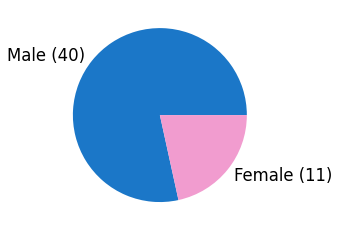

In [44]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([male_length, female_length])
mylabels = ["Male (40)", "Female (11)"]
mycolors = ["#1B77C8", "#F19CCF"]

plt.pie(y, labels = mylabels, colors = mycolors)
plt.savefig('sex_distribution.png')
plt.show()


We then retrieve all of the neuropixel probe data specific to the dentate gyrus. 

In [45]:
probes = cache.get_probes()

##filter_probes = probes[(['DG' in acronyms for acronyms in sessions.ecephys_structure_acronyms])]

## having trouble getting the dataset fitlered specifically to probes. 
print('Total number of probes: ' + str(len(probes)))

probes.head()

Total number of probes: 332


,ecephys_session_id,lfp_sampling_rate,name,phase,sampling_rate,has_lfp_data,unit_count,channel_count,ecephys_structure_acronyms
id,,,,,,,,,
729445648,719161530,1249.998642,probeA,3a,29999.967418,True,87,374,"[APN, LP, MB, DG, CA1, VISam, nan]"
729445650,719161530,1249.996620,probeB,3a,29999.918880,True,202,368,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan]"
729445652,719161530,1249.999897,probeC,3a,29999.997521,True,207,373,"[APN, NOT, MB, DG, SUB, VISp, nan]"
729445654,719161530,1249.996707,probeD,3a,29999.920963,True,93,358,"[grey, VL, CA3, CA2, CA1, VISl, nan]"
729445656,719161530,1249.999979,probeE,3a,29999.999500,True,138,370,"[PO, VPM, TH, LP, LGd, CA3, DG, CA1, VISal, nan]"


### Peristimulus Time Histogram - natural scenes - dentate gyrus - male mice session ID = 715093703
Now we will try to create a peristimulus time histogram for one session of the male mice responding to natural images. 

In [19]:
session_id = 715093703
session = cache.get_session_data(session_id)
session.metadata


{'specimen_name': 'Sst-IRES-Cre;Ai32-386129',
 'session_type': 'brain_observatory_1.1',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
 'sex': 'M',
 'age_in_days': 118.0,
 'rig_equipment_name': 'NP.1',
 'num_units': 884,
 'num_channels': 2219,
 'num_probes': 6,
 'num_stimulus_presentations': 70388,
 'session_start_time': datetime.datetime(2019, 1, 19, 0, 54, 18, tzinfo=tzoffset(None, -28800)),
 'ecephys_session_id': 715093703,
 'structure_acronyms': ['PO',
  'PoT',
  'LP',
  'DG',
  'CA1',
  'VISp',
  nan,
  'LGd',
  'CA3',
  'VISl',
  'VISrl',
  'grey',
  'VISpm',
  'VISam',
  'APN',
  'MB'],
 'stimulus_names': ['spontaneous',
  'gabors',
  'flashes',
  'drifting_gratings',
  'natural_movie_three',
  'natural_movie_one',
  'static_gratings',
  'natural_scenes']}

In [20]:
presentations = session.get_stimulus_table("natural_scenes")
units = session.units[session.units["ecephys_structure_acronym"] == 'DG']

time_step = 0.01
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

histograms.coords


Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 51353 ... 68226
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.095 ... 0.495
  * unit_id                          (unit_id) int64 950911006 ... 950949428

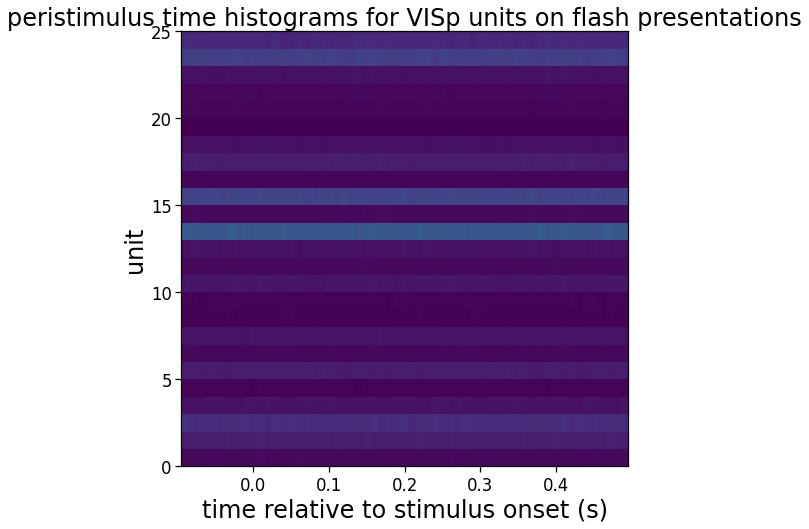

In [21]:
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for DG units on natural scene presentations", fontsize=24)

plt.show()

During lab we will repeat this process for a few more male mice and female mice and see if there are any preliminary differences in the data. 

During lab we will also use this guide (https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_session.html) to try and develop a raster spike plot of DG data in males and females. 

## Resources:


### Sample Allen Jupyter Notebooks to get started:
https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html
https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html


Insert text. 